<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 7.9 MB/s 


In [3]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 103 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638807 sha256=8c1c4dab4bf6b3bf822b80d93610f96cb8f14da5e0a4840498bd1de2cbafd8a4
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [4]:
import pyupbit

In [11]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-sol", interval="minute15")
df

,open,high,low,close,volume,value
2022-11-20 21:45:00,17460.0,17490.0,17420.0,17440.0,2.715002e+04,4.736864e+08
2022-11-20 22:00:00,17450.0,17560.0,17440.0,17560.0,2.223830e+04,3.893798e+08
2022-11-20 22:15:00,17540.0,17590.0,17480.0,17510.0,3.192834e+04,5.596833e+08
2022-11-20 22:30:00,17520.0,17740.0,17490.0,17720.0,1.075190e+05,1.897318e+09
2022-11-20 22:45:00,17730.0,19150.0,17720.0,17950.0,1.723412e+06,3.172396e+10
...,...,...,...,...,...,...
2022-11-22 22:30:00,16080.0,16200.0,15950.0,16080.0,6.797635e+04,1.092185e+09
2022-11-22 22:45:00,16080.0,16590.0,16010.0,16520.0,1.634816e+05,2.669136e+09
2022-11-22 23:00:00,16530.0,16630.0,16320.0,16320.0,1.722165e+05,2.831146e+09
2022-11-22 23:15:00,16330.0,16610.0,16280.0,16390.0,9.604836e+04,1.577951e+09


In [12]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-11-20 21:45:00,17440.0
1,2022-11-20 22:00:00,17560.0
2,2022-11-20 22:15:00,17510.0
3,2022-11-20 22:30:00,17720.0
4,2022-11-20 22:45:00,17950.0
...,...,...
195,2022-11-22 22:30:00,16080.0
196,2022-11-22 22:45:00,16520.0
197,2022-11-22 23:00:00,16320.0
198,2022-11-22 23:15:00,16390.0


In [13]:
#prophet 불러옴
from fbprophet import Prophet

In [14]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [15]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

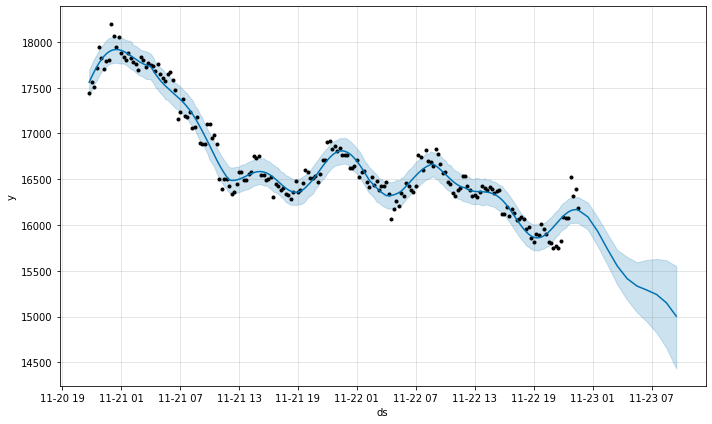

In [16]:
#그래프1
fig1 = model.plot(forecast)

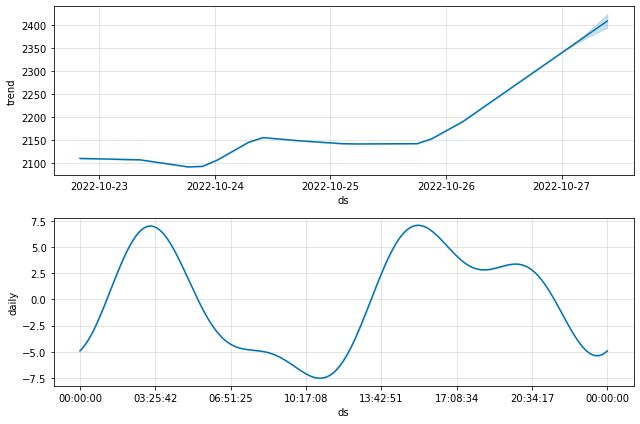

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)